In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [17]:
sex_trafficant = pd.read_csv('C:/Users/seonh/Downloads/dataset2.csv', encoding='cp949')

C:\Users\seonh\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (27) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


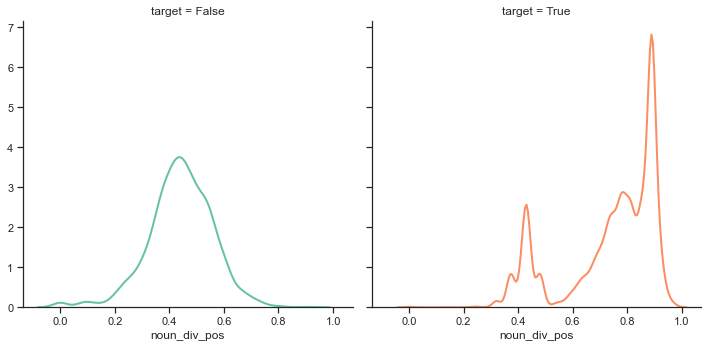

In [23]:
#형태소 중 명사가 차지하는 비율: 성매매 트윗이 훨씬 많은 비율을 차지함
sns.set_style('ticks')
g = sns.FacetGrid(data=sex_trafficant, col='target', hue='target', palette='Set2', height=5)
g = g.map(sns.kdeplot, 'noun_div_pos', lw=2)
fig = plt.gcf()

In [4]:
fig.savefig('noun.png', dpi=400, bbox_inches='tight', pad_inches=0.3)

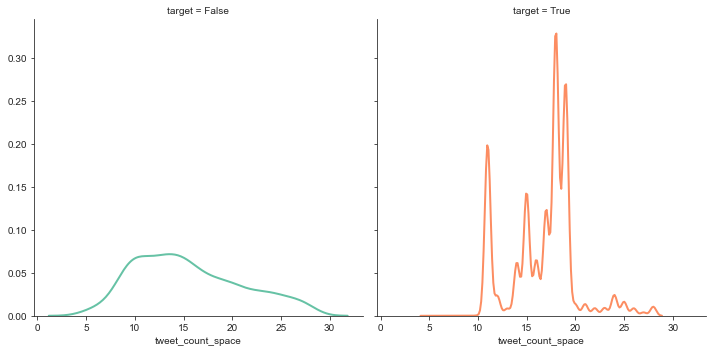

In [5]:
#트윗 당 공백 개수: 성매매 트윗이 더 공백이 많이, 불규칙적으로 나타남
sns.set_style('ticks')
g = sns.FacetGrid(data=sex_trafficant, col='target', hue='target', palette='Set2', height=5)
g = g.map(sns.kdeplot, 'tweet_count_space', lw=2)
fig = plt.gcf()

In [6]:
fig.savefig('space.png', dpi=400, bbox_inches='tight', pad_inches=0.3)

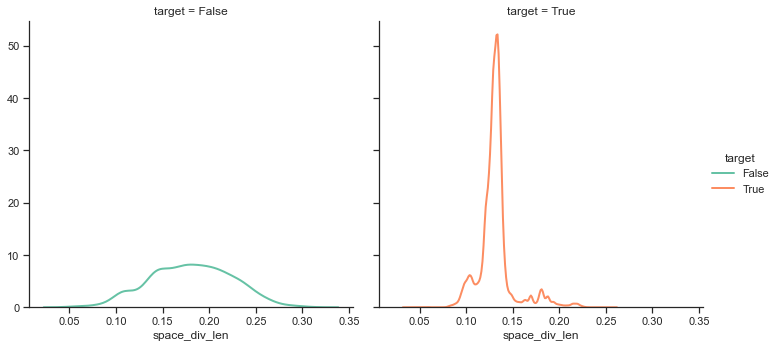

In [14]:
#트윗 내 공백 비율: 성매매 트윗이 더 불규칙함
sns.set_style('ticks')
g = sns.FacetGrid(data=sex_trafficant, col='target', hue='target', palette='Set2', height=5)
g = g.map(sns.kdeplot, 'space_div_len', lw=2)
g = g.add_legend()
fig = plt.gcf()

In [15]:
fig.savefig('spaceprop.png', dpi=400, bbox_inches='tight', pad_inches=0.3)

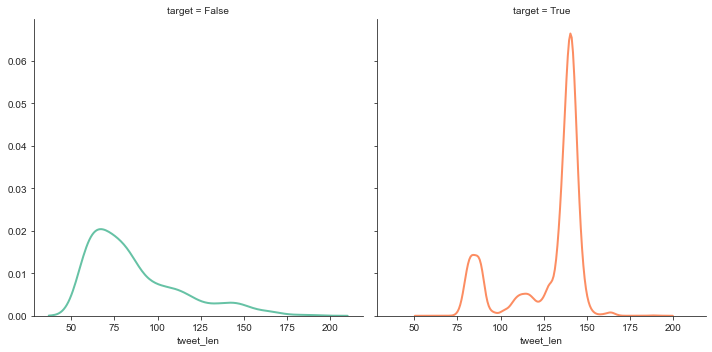

In [7]:
#트윗 길이: 성매매 트윗이 더 긺(트윗 글자수 제한이 최대 140자)
sns.set_style('ticks')
g = sns.FacetGrid(data=sex_trafficant, col='target', hue='target', palette='Set2', height=5)
g = g.map(sns.kdeplot, 'tweet_len', lw=2)
fig = plt.gcf()

In [8]:
fig.savefig('length.png', dpi=400, bbox_inches='tight', pad_inches=0.3)

In [9]:
svu = sex_trafficant[~sex_trafficant.likes_count.isin(['0'])]

C:\Users\seonh\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


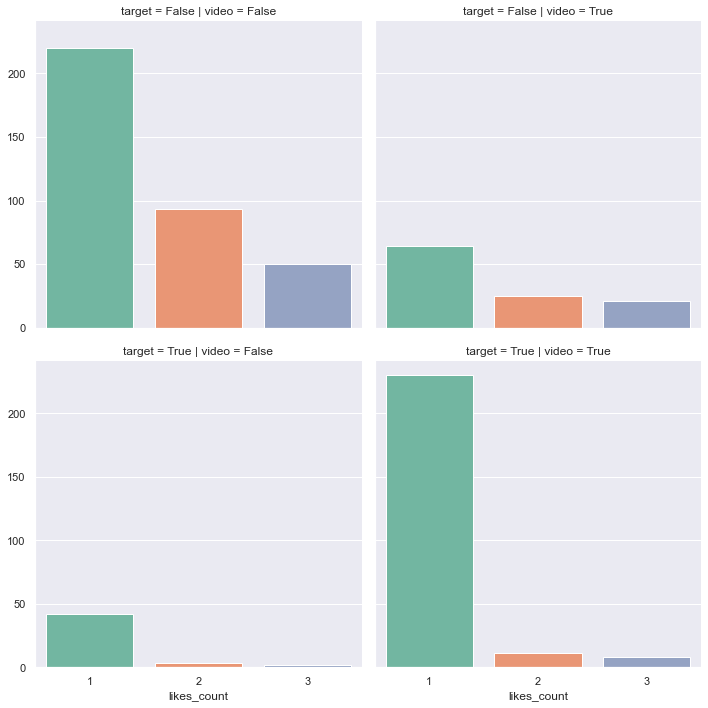

In [10]:
#비디오의 존재 여부와 좋아요 개수의 관계: 대부분 좋아요는 한 개
#일반 트윗은 성매매 트윗에 비해 좋아요 개수가 많은 편.
# 비디오가 없을 때 좋아요가 더 많은 것은 대부분 글만 적을 때가 많기 때문?
#성매매 트윗은 비디오가 있을 때 좋아요가 더 많음.
# 그런데 조직적이나 인위적으로 좋아요를 누르는 것인지는 알 수 없음.
sns.set(font_scale=1)
g = sns.FacetGrid(data=svu, col='video', row='target', height=5)
g = g.map(sns.countplot, 'likes_count', palette='Set2')
fig = plt.gcf()

In [11]:
fig.savefig('relations.png', dpi=400, bbox_inches='tight', pad_inches=0.3)

C:\Users\seonh\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (27) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


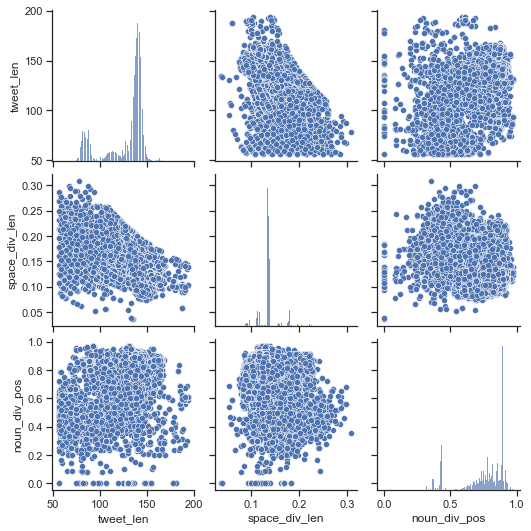

In [24]:
traffic = sex_trafficant[~sex_trafficant.target.isin(['FALSE'])]
traffic = traffic[['tweet_len', 'space_div_len', 'noun_div_pos']]

g = sns.pairplot(traffic)